In [42]:
'''
surfplot_thresholded.ipynb
Fig6. visualize thresholded & workbench clustered surfaces
remember to: conda activate surf
Oct 2024 Jane
'''

In [ ]:
# import 
from neuromaps.datasets import fetch_fsaverage
from surfplot import Plot
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# install workbench 
#
# run wb_command
# wb_command -metric-find-clusters ./fmri/suma-fsaverage6/lh.inflated.gii ./fmri/pymvpa/thresholded_boot_results_1sided_bh_{model}_lh.gii 0 100 thresholded_mask_cluster100_{model}_lh.gii
# wb_command -metric-find-clusters ./fmri/suma-fsaverage6/rh.inflated.gii ./fmri/pymvpa/thresholded_boot_results_1sided_bh_{model}_rh.gii 0 100 thresholded_mask_cluster100_{model}_rh.gii
#
# wb_command -metric-find-clusters ./fmri/suma-fsaverage6/lh.inflated.gii ./fmri/pymvpa/thres0.001_boot10000_results_1sided_bh_{model}_lh.gii 0 100 ./fmri/pymvpa/thres0.001_boot10000_mask_cluster100_{model}_lh.gii
# wb_command -metric-find-clusters ./fmri/suma-fsaverage6/rh.inflated.gii ./fmri/pymvpa/thres0.001_boot10000_results_1sided_bh_{model}_rh.gii 0 100 ./fmri/pymvpa/thres0.001_boot10000_mask_cluster100_{model}_lh.gii
#
# scp from local to hydra: thres0.001_boot10000_mask_cluster100_{model}_*h.gii
# scp down from hydra: variance_thres0.001_boot10000_cluster100_{model}_*h.gii

In [43]:
# change input of model to fn
def draw_thresholded(model, save_f, color_range=(0, .3), views=None, cmap='inferno'):
    surfaces = fetch_fsaverage(density='41k')
    lh, rh = surfaces['inflated']
    
    mask_rh = np.load('./cortical_mask_rh.npy')
    mask_lh = np.load('./cortical_mask_lh.npy')

    # cluster-thresholded mask applied surface 
    sl_lh = nib.load(f'./variance_thres0.001_boot10000_cluster100_{model}_lh.gii').agg_data()
    sl_rh = nib.load(f'./variance_thres0.001_boot10000_cluster100_{model}_rh.gii').agg_data()
    
    # (debug) mask check 
    #sl_lh = nib.load(f'./thresholded_mask_cluster100_{model}_lh.gii').agg_data()
    #sl_rh = nib.load(f'./thresholded_mask_cluster100_{model}_rh.gii').agg_data()        

    p = Plot(surf_lh=lh, surf_rh=rh, views=views, brightness=0.7, zoom=1.58, size=(500, 375))
    p.add_layer({'left': sl_lh, 'right': sl_rh}, cmap=cmap,
                color_range=color_range) #0 to 0.4 for all models #.75
    cbar_kws = dict(location='right', draw_border=False, aspect=10,
                    shrink=.3, decimals=3, pad=0)
    fig = p.build(scale=(3, 3), cbar_kws=cbar_kws)
    print(f'{model}: thresholding 0.001 max {np.nanmax(np.concatenate((sl_lh, sl_rh)))}')

    # save fig
    plt.savefig(save_f, dpi=300, transparent=True, bbox_inches='tight')
    print(f'saved {save_f}')

In [44]:
###########################################
cmap = 'YlOrRd' #'inferno'
############################################

all-all-ts thresholding 0.001 max 0.12016279995441437
./plot/unique_all-all-ts_lm.png


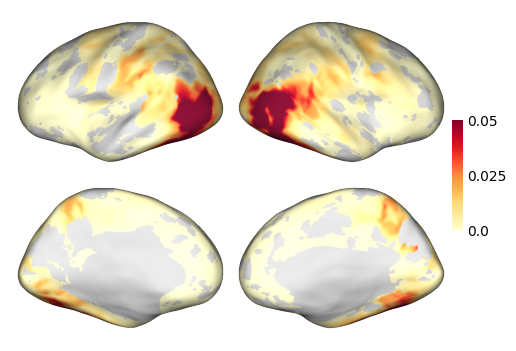

In [57]:
# plotted the mask 
model = 'all-all-ts'
save_f = f'./plot/unique_{model}_lm.png'
draw_thresholded(model, save_f, color_range=(0, 0.05), cmap=cmap)

all-all-ts thresholding 0.001 max 0.12016279995441437
./plot/unique_all-all-ts_v.png


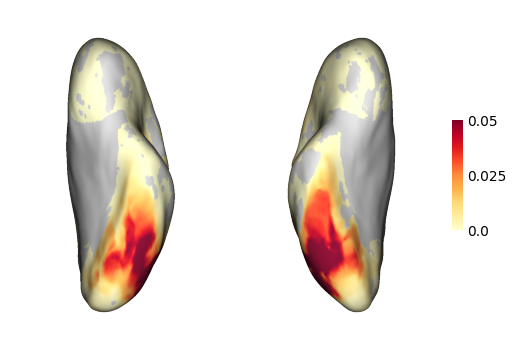

In [58]:
model = 'all-all-ts'
save_f = f'./plot/unique_{model}_v.png'
draw_thresholded(model, save_f, views='ventral', color_range=(0, 0.05), cmap=cmap)

all-all-ts thresholding 0.001 max 0.12016279995441437
./plot/unique_all-all-ts_p.png


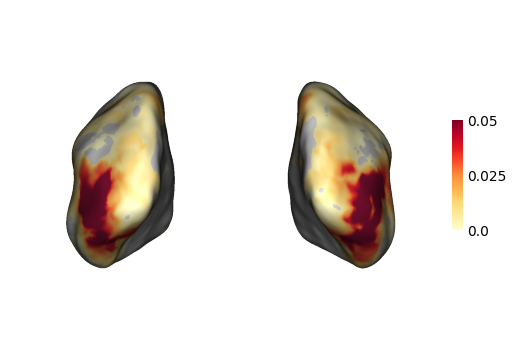

In [64]:
model = 'all-all-ts'
save_f = f'./plot/unique_{model}_p.png'
draw_thresholded(model, save_f, views='posterior', color_range=(0, 0.05), cmap=cmap)

all-all-transitivity thresholding 0.001 max 0.05575904995203018
./plot/unique_all-all-transitivity_lm.png


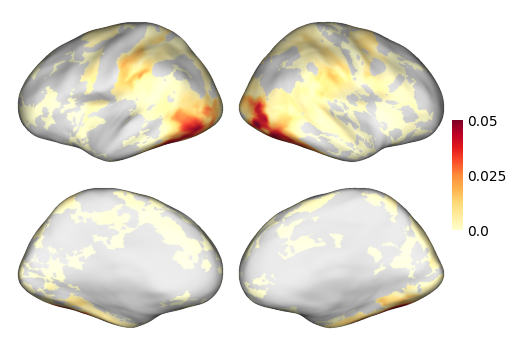

In [55]:
model = 'all-all-transitivity'
save_f = f'./plot/unique_{model}_lm.png'
draw_thresholded(model, save_f, color_range=(0, 0.05), cmap=cmap)

all-all-transitivity thresholding 0.001 max 0.05575904995203018
./plot/unique_all-all-transitivity_v.png


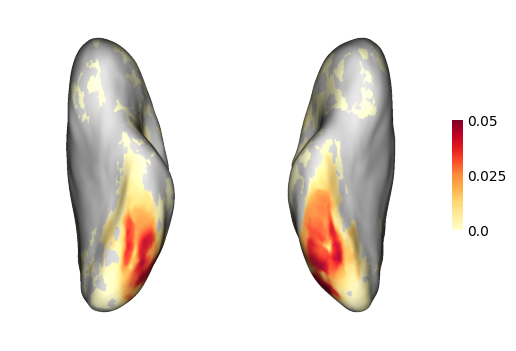

In [56]:
model = 'all-all-transitivity'
save_f = f'./plot/unique_{model}_v.png'
draw_thresholded(model, save_f, views='ventral', color_range=(0, 0.05), cmap=cmap)

all-all-transitivity thresholding 0.001 max 0.05575904995203018
./plot/unique_all-all-transitivity_p.png


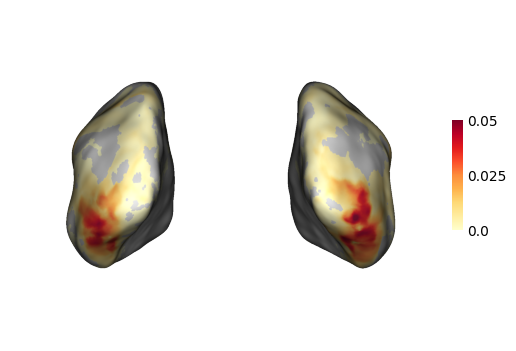

In [63]:
model = 'all-all-transitivity'
save_f = f'./plot/unique_{model}_p.png'
draw_thresholded(model, save_f, views='posterior', color_range=(0, 0.05), cmap=cmap)

all-all-sociality thresholding 0.001 max 0.0733446404337883
./plot/unique_all-all-sociality_lm.png


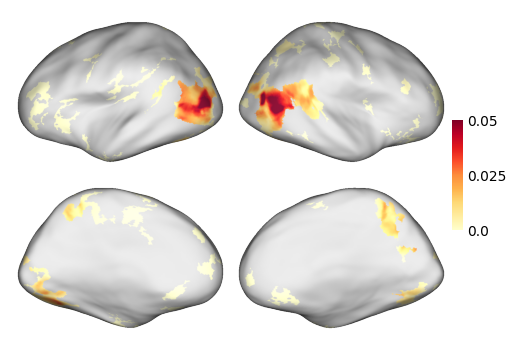

In [59]:
model = 'all-all-sociality'
save_f = f'./plot/unique_{model}_lm.png'
draw_thresholded(model, save_f, color_range=(0, 0.05), cmap=cmap)

all-all-sociality thresholding 0.001 max 0.0733446404337883
./plot/unique_all-all-sociality_v.png


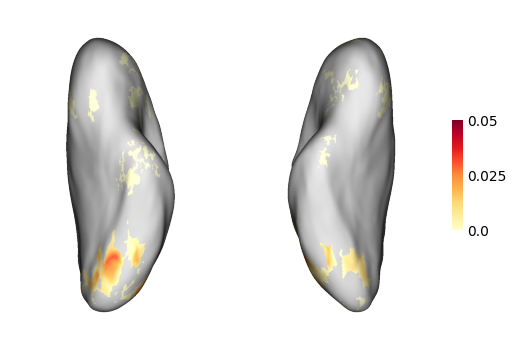

In [60]:
model = 'all-all-sociality'
save_f = f'./plot/unique_{model}_v.png'
draw_thresholded(model, save_f, views='ventral', color_range=(0, 0.05), cmap=cmap)

all-all-sociality thresholding 0.001 max 0.0733446404337883
./plot/unique_all-all-sociality_p.png


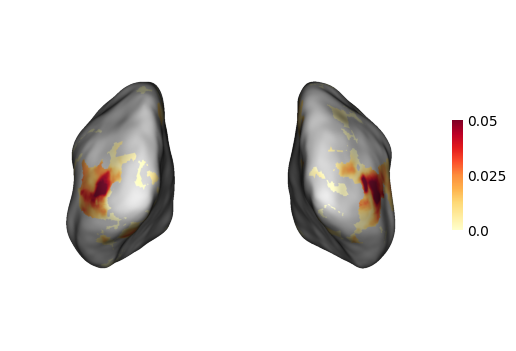

In [65]:
model = 'all-all-sociality'
save_f = f'./plot/unique_{model}_p.png'
draw_thresholded(model, save_f, views='posterior', color_range=(0, 0.05), cmap=cmap)